# Artificial Neural Network (ANN) - Fashion MNIST Classification - Case Study - Tensorflow 2.0.0
---
Author: Bhaveshkumar Thaker

---

## Import Packages

In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 380.8MB 57kB/s 
     |████████████████████████████████| 3.8MB 28.7MB/s 
     |████████████████████████████████| 450kB 46.1MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
import os, sys, random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub

In [3]:
print(tf.version.VERSION)
print("Eager mode: ", tf.executing_eagerly())
print('GPU is', 'available' if tf.config.experimental.list_physical_devices('GPU') else 'NOT AVILABLE')

2.0.0
Eager mode:  True
GPU is available


In [4]:
seed = 321

random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

%matplotlib inline

plt.figure(figsize = (14, 11))
plt.style.use('seaborn')

colors = mcolors.TABLEAU_COLORS
sns.set(rc={'figure.figsize' : (14, 11), 'figure.facecolor': 'whitesmoke', 'axes.facecolor': 'whitesmoke', 'grid.color': 'slategrey'})
sns.color_palette(palette = list(colors.values()));

<Figure size 1008x792 with 0 Axes>

## Import the Digits MNIST dataset

In [5]:
digit_mnist_dataset = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = digit_mnist_dataset.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Explore the data

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
labels, count = np.unique(train_labels, return_counts=True)
print(np.asarray((labels, count)).T)

[[   0 5923]
 [   1 6742]
 [   2 5958]
 [   3 6131]
 [   4 5842]
 [   5 5421]
 [   6 5918]
 [   7 6265]
 [   8 5851]
 [   9 5949]]


In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_images)

10000

## Preprocess the data

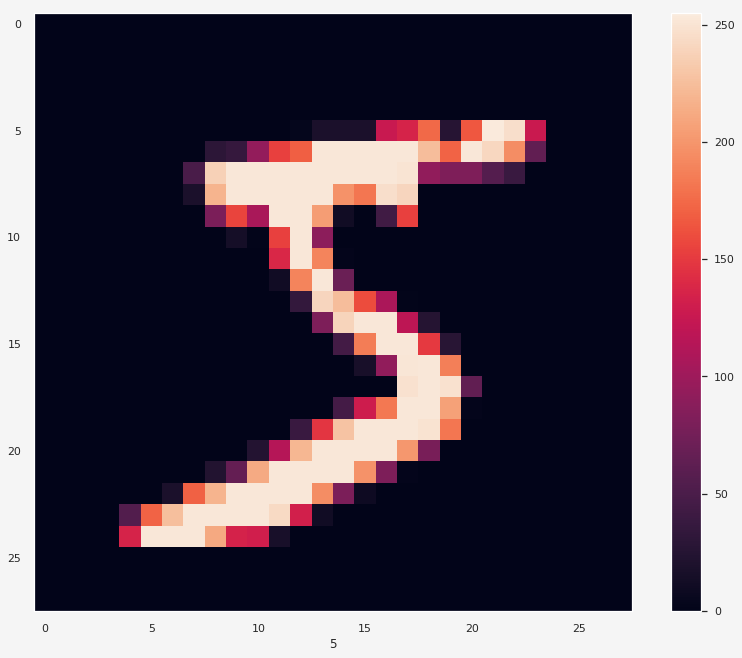

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.xlabel(train_labels[0])
plt.grid(False)
plt.colorbar()
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

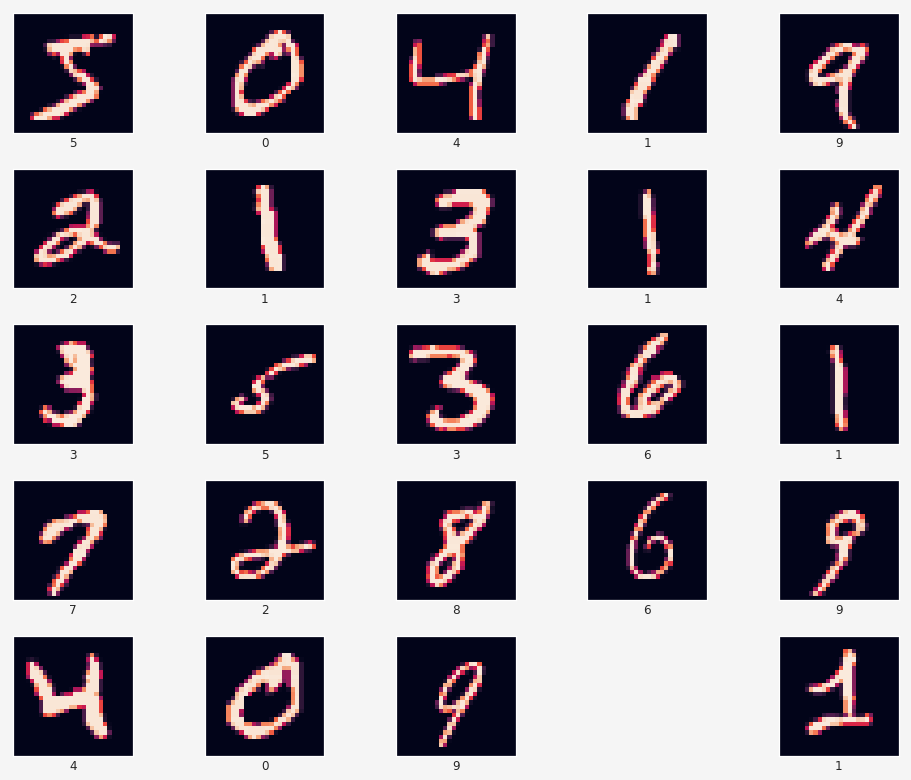

In [13]:
for i in range(25) :
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.tight_layout()

plt.show()

## Build the model

In [0]:
input_size = 784
output_size = 10

hidden_layers = 128

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(hidden_layers, activation='relu'))
model.add(tf.keras.layers.Dense(hidden_layers, activation='relu'))
model.add(tf.keras.layers.Dense(output_size, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=10, verbose=1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2320 - accuracy: 0.9308
Epoch 2/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0983 - accuracy: 0.9703
Epoch 3/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0679 - accuracy: 0.9791
Epoch 4/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0527 - accuracy: 0.9830
Epoch 5/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0400 - accuracy: 0.9867
Epoch 6/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0346 - accuracy: 0.9885
Epoch 7/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0270 - accuracy: 0.9912
Epoch 8/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0223 - accuracy: 0.9929
Epoch 9/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0209 - accuracy: 0.9932
Epoch 10/10
6

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)

print('\nTest accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [19]:
predictions = model.predict(test_images)
predictions[0]

array([1.1466523e-11, 6.6243795e-11, 1.5162645e-12, 5.4755417e-10,
       2.4855642e-11, 5.6482146e-13, 9.4509575e-16, 1.0000000e+00,
       2.0902560e-13, 9.9760884e-09], dtype=float32)

In [0]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four',
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [0]:
def plot_image(i, predictions_array, true_label, img):
    (predictions_array, true_label, img) = (predictions_array,
            true_label[i], img[i])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
               100 * np.max(predictions_array),
               class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    (predictions_array, true_label) = (predictions_array, true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

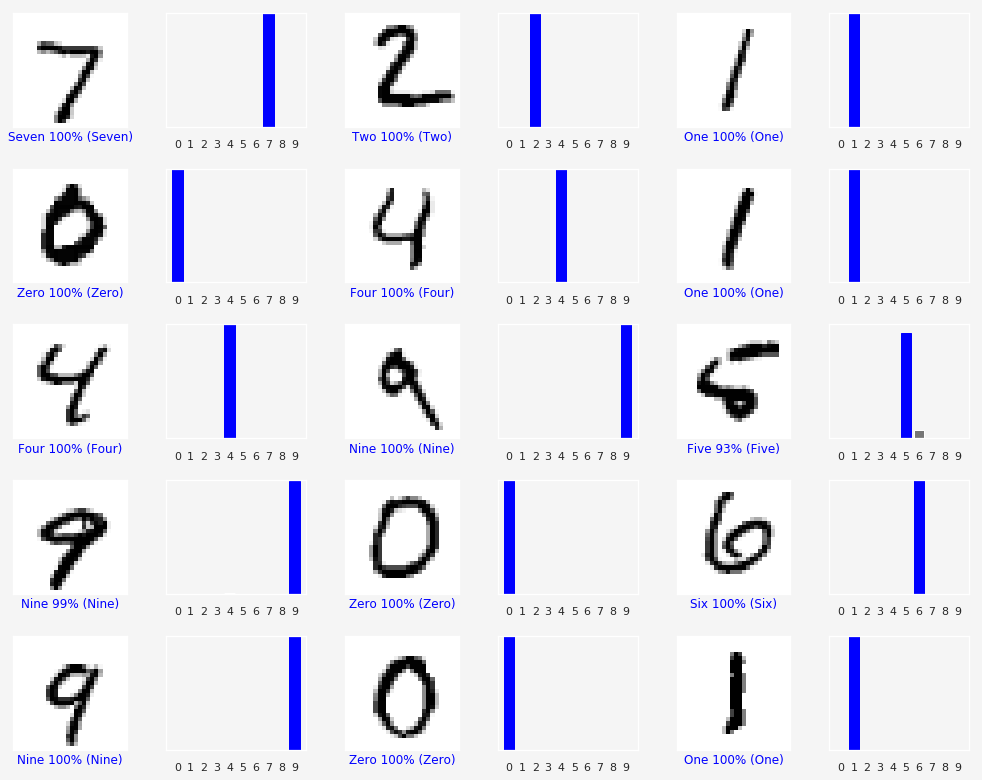

In [22]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

# plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()